<a href="https://colab.research.google.com/github/AllisonOge/predictive_modeling/blob/main/predictive_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
sns.set(style='darkgrid')
# increase the figure size
sns.set(rc={'figure.figsize': (15, 5)})


import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
sensor_df = pd.read_csv("sensor_ml.csv", index_col="id")

In [3]:
sensor_df

,chan_1,chan_2,chan_3,chan_4,created_at
id,,,,,
1,1,1,0,1,2022-10-26 11:29:12
2,1,1,0,1,2022-10-26 11:29:12
3,1,1,0,1,2022-10-26 11:29:13
4,1,1,0,1,2022-10-26 11:29:13
5,1,1,0,1,2022-10-26 11:29:13
...,...,...,...,...,...
3660,1,1,0,1,2022-10-26 11:40:06
3661,1,1,0,1,2022-10-26 11:40:06
3662,1,1,0,1,2022-10-26 11:40:06


In [4]:
sensor_df.shape

(3664, 5)

In [5]:
pd.__version__

'1.3.5'

In [6]:
sensor_df.groupby("created_at")["chan_1"].value_counts()

created_at           chan_1
2022-10-26 11:29:12  1         2
2022-10-26 11:29:13  1         6
2022-10-26 11:29:14  1         7
2022-10-26 11:29:15  1         7
2022-10-26 11:29:16  1         5
                              ..
2022-10-26 11:40:04  1         5
2022-10-26 11:40:05  1         6
2022-10-26 11:40:06  1         5
2022-10-26 11:42:25  0         1
2022-10-26 11:42:30  0         1
Name: chan_1, Length: 678, dtype: int64

In [7]:
sensor_df.groupby("created_at")["chan_2"].value_counts()

created_at           chan_2
2022-10-26 11:29:12  1         2
2022-10-26 11:29:13  1         6
2022-10-26 11:29:14  1         7
2022-10-26 11:29:15  1         7
2022-10-26 11:29:16  1         5
                              ..
2022-10-26 11:40:04  1         5
2022-10-26 11:40:05  1         6
2022-10-26 11:40:06  1         5
2022-10-26 11:42:25  0         1
2022-10-26 11:42:30  0         1
Name: chan_2, Length: 711, dtype: int64

In [8]:
sensor_df.groupby("created_at")["chan_3"].value_counts()

created_at           chan_3
2022-10-26 11:29:12  0         2
2022-10-26 11:29:13  0         6
2022-10-26 11:29:14  0         7
2022-10-26 11:29:15  0         7
2022-10-26 11:29:16  0         5
                              ..
2022-10-26 11:40:04  0         5
2022-10-26 11:40:05  0         6
2022-10-26 11:40:06  0         5
2022-10-26 11:42:25  0         1
2022-10-26 11:42:30  0         1
Name: chan_3, Length: 706, dtype: int64

In [9]:
sensor_df.groupby("created_at")["chan_4"].value_counts()

created_at           chan_4
2022-10-26 11:29:12  1         2
2022-10-26 11:29:13  1         6
2022-10-26 11:29:14  1         7
2022-10-26 11:29:15  1         7
2022-10-26 11:29:16  0         3
                              ..
2022-10-26 11:40:04  1         1
2022-10-26 11:40:05  1         6
2022-10-26 11:40:06  1         5
2022-10-26 11:42:25  0         1
2022-10-26 11:42:30  0         1
Name: chan_4, Length: 867, dtype: int64

In [10]:
sensor_copy_df = sensor_df
sensor_copy_df = sensor_copy_df.drop_duplicates(subset="created_at")
sensor_copy_df = sensor_copy_df.set_index("created_at")

In [11]:
sensor_copy_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-10-26 11:29:12,1,1,0,1
2022-10-26 11:29:13,1,1,0,1
2022-10-26 11:29:14,1,1,0,1
2022-10-26 11:29:15,1,1,0,1
2022-10-26 11:29:16,1,1,0,1
...,...,...,...,...
2022-10-26 11:40:04,1,1,0,0
2022-10-26 11:40:05,1,1,0,1
2022-10-26 11:40:06,1,1,0,1


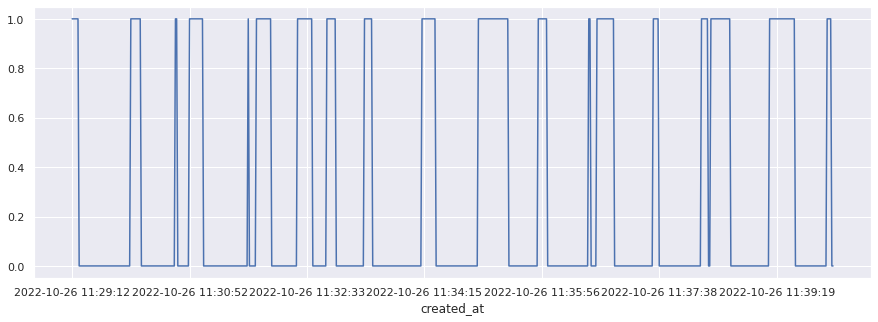

In [12]:
sensor_copy_df["chan_1"].plot()

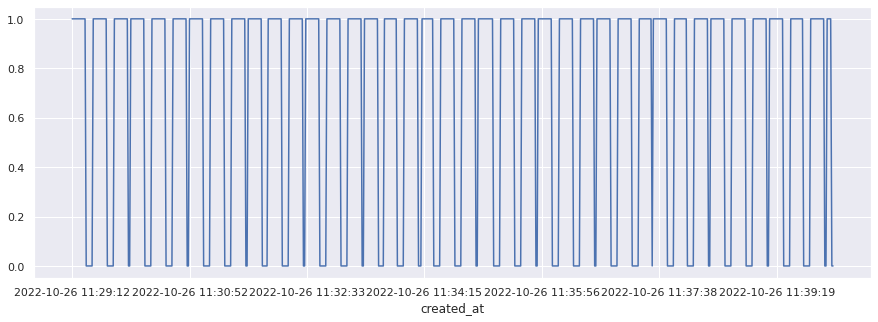

In [13]:
sensor_copy_df["chan_2"].plot()

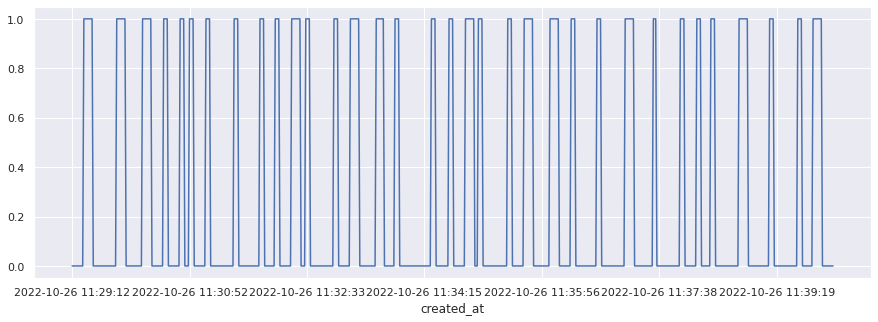

In [14]:
sensor_copy_df["chan_3"].plot()

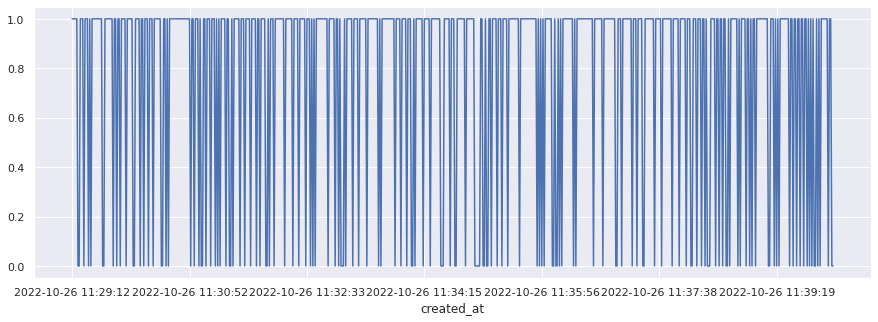

In [15]:
sensor_copy_df["chan_4"].plot()

In [16]:
sensor_copy_df.to_numpy()

array([[1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       ...,
       [1, 1, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [17]:
def df_to_X_y(df, window_size=10):
  X = []
  y = []
  for i in range(df.shape[0]-window_size):
    X.append([r for r in df.to_numpy()[i:window_size+i]])
    y.append(df.to_numpy()[window_size+i])
  return np.array(X), np.array(y)

In [18]:
X, y =df_to_X_y(sensor_copy_df)
X.shape, y.shape

((639, 10, 4), (639, 4))

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

## Build the model 🧠

In [20]:
def build_model():
  return tf.keras.Sequential([
      tf.keras.layers.Input((X.shape[1], X.shape[2])),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(4, activation="sigmoid")
  ])

In [21]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(255, 10, 4) (255, 4)
(192, 10, 4) (192, 4)
(192, 10, 4) (192, 4)


In [22]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1344      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 1,516
Trainable params: 1,516
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=BinaryAccuracy())

In [35]:
history = model.fit(X_train, y_train, epochs=50, batch_size=30, validation_data=(X_valid, y_valid))

Epoch 1/50
9/9 [==============================] - 0s 28ms/step - loss: 0.3984 - binary_accuracy: 0.8225 - val_loss: 0.4297 - val_binary_accuracy: 0.8229
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3945 - binary_accuracy: 0.8343 - val_loss: 0.4268 - val_binary_accuracy: 0.8229
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3902 - binary_accuracy: 0.8392 - val_loss: 0.4249 - val_binary_accuracy: 0.8281
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3869 - binary_accuracy: 0.8471 - val_loss: 0.4221 - val_binary_accuracy: 0.8333
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3841 - binary_accuracy: 0.8412 - val_loss: 0.4192 - val_binary_accuracy: 0.8359
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 0.3802 - binary_accuracy: 0.8431 - val_loss: 0.4175 - val_binary_accuracy: 0.8398
Epoch 7/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3783 - bin

Text(0, 0.5, 'accuracy')

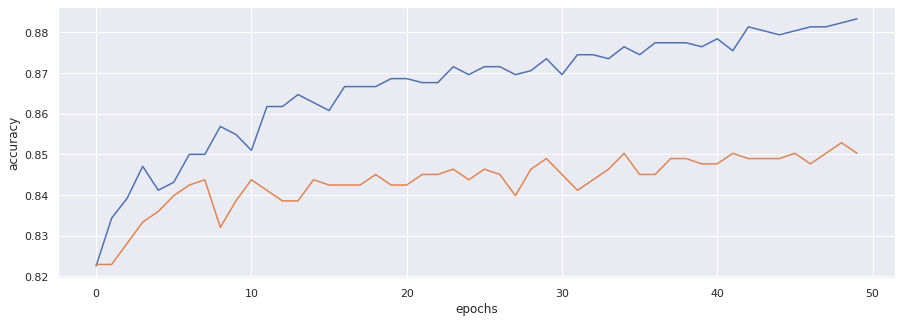

In [36]:
plt.plot(history.history["binary_accuracy"], label="Training accuracy")
plt.plot(history.history["val_binary_accuracy"], label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

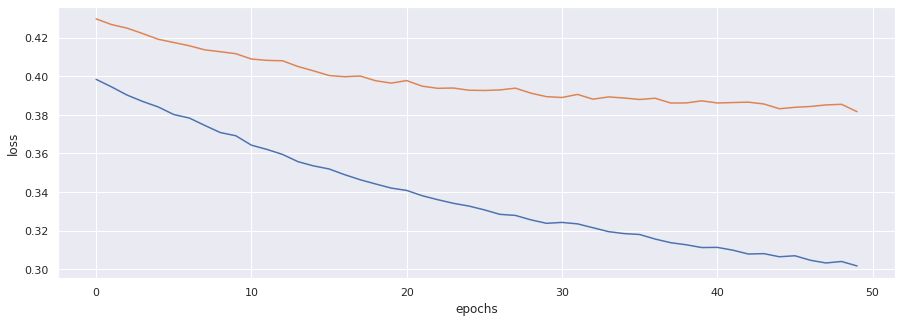

In [37]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")

In [38]:
test_predictions = (model.predict(X_test)>0.5).astype(int)
test_predictions 

6/6 [==============================] - 0s 3ms/step


array([[1, 1, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 1, 1],
       [0, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 1],
       [1, 1, 0, 0],
       [0, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 0, 0, 1],
       [1, 1, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 1, 0, 1],
       [0, 0, 1, 0],
       [1, 1, 0, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 0],
       [0, 1, 1, 1],
       [0, 1, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 1, 1],
       [1, 1, 0, 1],
       [0, 0,

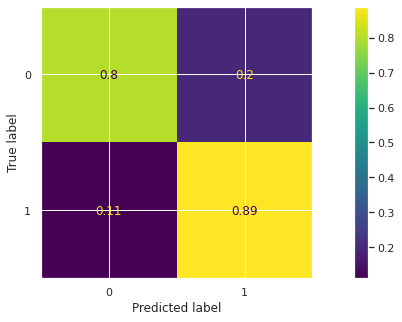

In [39]:
cm = metrics.confusion_matrix(y_test.flatten(), test_predictions.flatten(), normalize="true")
display_cm = metrics.ConfusionMatrixDisplay(cm)
display_cm.plot()

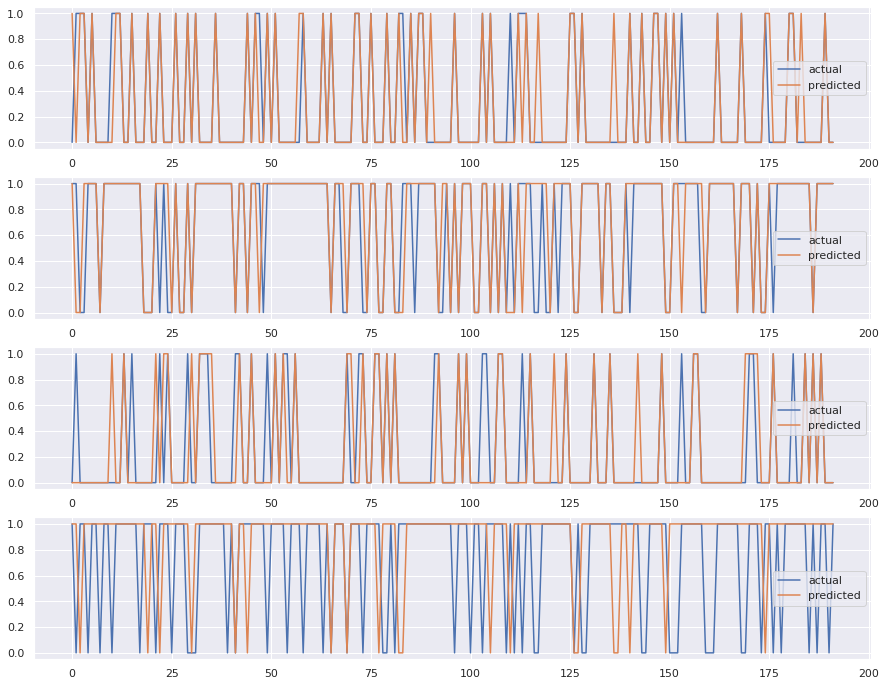

In [86]:
nchannels = y.shape[1]
fig, ax = plt.subplots(nrows=nchannels, ncols=1, figsize=(15, 12))
for i in range(nchannels):
  ax[i].plot(y_test[:, i], label="actual")
  ax[i].plot(test_predictions[:, i], label="predicted")
  ax[i].legend()

Hypothesis 🤔: Can my model predict the idle time for a channel?

In [41]:
def start_and_idle_time(bit_sequence):
    bit_sequence = np.asarray(bit_sequence, dtype=np.int32)
    start_time = 0
    idle_time = 0
    idle_times = []
    for i, bit in enumerate(bit_sequence):
        # print(i, bit)
        if i > 0:
            if bit == 0 and bit_sequence[i-1] == 1:
                # 1,0
                start_time = i
                idle_time += 1
            elif bit == 0 and bit_sequence[i-1] == 0:
                # 0,0
                idle_time += 1
            elif bit == 1 and bit_sequence[i-1] == 0:
                # 0,1
                idle_times.append((start_time, idle_time))
                idle_time = 0
            else:
                # 1,1
                continue
        else:
            if bit == 0:
                start_time = i
                idle_time += 1

        if i == len(bit_sequence)-1 and idle_time > 0:
            idle_times.append((start_time, idle_time))

    return np.array(idle_times)

In [59]:
def df_to_X_y2(df, window_size=10):
  X = []
  y = []
  for i in range(df.shape[0]-window_size):
    X.append([r for r in df.to_numpy()[i:window_size+i]])
    idle_times = [i[0][1] for i in  list(map(start_and_idle_time, df.to_numpy()[window_size+i:].transpose()))]
    y.append(idle_times)
  return np.array(X), np.array(y)

In [125]:
def get_idletimes_df(df):
  idle_times = []
  for i in range(df.shape[0]):
    idle_times.append([j[0][1] if i+j[0][0] <= i else 0 for j in  list(map(start_and_idle_time, df.to_numpy()[i:].transpose()))])
    
  return pd.DataFrame(data=idle_times, index=df.index)

In [126]:
idle_times_df = get_idletimes_df(sensor_copy_df)
idle_times_df

,0,1,2,3
created_at,,,,
2022-10-26 11:29:12,0,0,10,0
2022-10-26 11:29:13,0,0,9,0
2022-10-26 11:29:14,0,0,8,0
2022-10-26 11:29:15,0,0,7,0
2022-10-26 11:29:16,0,0,6,0
...,...,...,...,...
2022-10-26 11:40:04,0,0,5,1
2022-10-26 11:40:05,0,0,4,0
2022-10-26 11:40:06,0,0,3,0


In [129]:
X2, y2 = df_to_X_y(idle_times_df)
X2.shape, y2.shape

((639, 10, 4), (639, 4))

In [130]:
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.6)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_temp, y2_temp, test_size=0.5)
X2_train.shape, X2_test.shape, X2_val.shape

((255, 10, 4), (192, 10, 4), (192, 10, 4))

In [195]:
def build_model2():
  return tf.keras.models.Sequential([
      tf.keras.layers.Input((X2.shape[1], X2.shape[2])),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(4, activation="linear")
  ])

In [196]:
model2 = build_model2()
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 16)                1344      
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 4)                 68        
                                                                 
Total params: 1,684
Trainable params: 1,684
Non-trainable params: 0
_________________________________________________________________


In [197]:
model2.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [203]:
history2 = model2.fit(X2_train, y2_train, batch_size=30, epochs=40, validation_data=(X2_val, y2_val))

Epoch 1/40
9/9 [==============================] - 0s 14ms/step - loss: 69.0393 - accuracy: 0.6118 - val_loss: 72.3562 - val_accuracy: 0.6354
Epoch 2/40
9/9 [==============================] - 0s 10ms/step - loss: 65.9019 - accuracy: 0.6078 - val_loss: 68.7886 - val_accuracy: 0.6302
Epoch 3/40
9/9 [==============================] - 0s 10ms/step - loss: 62.5889 - accuracy: 0.6039 - val_loss: 64.6381 - val_accuracy: 0.6302
Epoch 4/40
9/9 [==============================] - 0s 11ms/step - loss: 58.3739 - accuracy: 0.6039 - val_loss: 59.6258 - val_accuracy: 0.6302
Epoch 5/40
9/9 [==============================] - 0s 10ms/step - loss: 53.7292 - accuracy: 0.6039 - val_loss: 54.4743 - val_accuracy: 0.6302
Epoch 6/40
9/9 [==============================] - 0s 11ms/step - loss: 49.5021 - accuracy: 0.6039 - val_loss: 50.3077 - val_accuracy: 0.6302
Epoch 7/40
9/9 [==============================] - 0s 11ms/step - loss: 46.0025 - accuracy: 0.6039 - val_loss: 46.9409 - val_accuracy: 0.6302
Epoch 8/40
9/

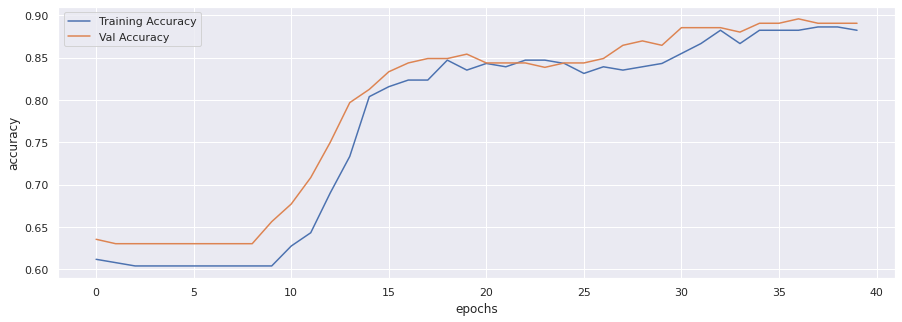

In [204]:
plt.plot(history2.history["accuracy"], label="Training Accuracy")
plt.plot(history2.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

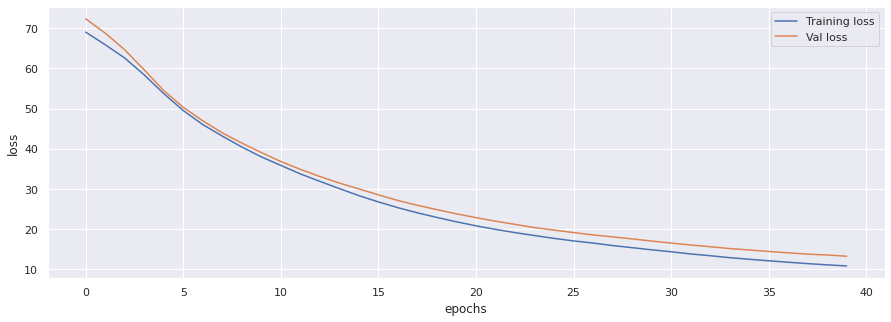

In [205]:
plt.plot(history2.history["loss"], label="Training loss")
plt.plot(history2.history["val_loss"], label="Val loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [206]:
test_preds = model2.predict(X2_test)
test_preds

6/6 [==============================] - 0s 3ms/step


array([[ 7.98949862e+00,  6.70758307e-01,  3.08566511e-01,
         3.96894813e-01],
       [ 7.23416424e+00,  7.52017796e-02,  4.47651196e+00,
         1.24064617e-01],
       [ 3.44838500e+00,  2.09748238e-01,  5.21277905e+00,
         3.03714812e-01],
       [ 2.62316341e+01,  1.76454687e+00,  7.06109142e+00,
         7.38643035e-02],
       [ 2.35457249e+01,  1.43746126e+00,  4.56419659e+00,
         2.79231429e-01],
       [ 2.81040478e+01,  1.27459860e+00,  8.40503788e+00,
        -3.73891369e-02],
       [ 1.52320290e+01,  1.22983873e+00,  1.84123015e+00,
         4.30893421e-01],
       [ 7.91446924e+00,  6.47915959e-01,  1.72213331e-01,
         4.17783618e-01],
       [ 3.86996388e+00,  5.07381678e-01,  8.16861629e+00,
         1.52600825e-01],
       [ 1.25255749e-01,  5.97111464e-01,  9.29028511e+00,
         2.58003712e-01],
       [ 4.02563477e+00,  4.19562906e-01,  9.26252460e+00,
         1.79769993e-01],
       [ 1.09665689e+01,  1.27412426e+00,  1.09158125e+01,
      

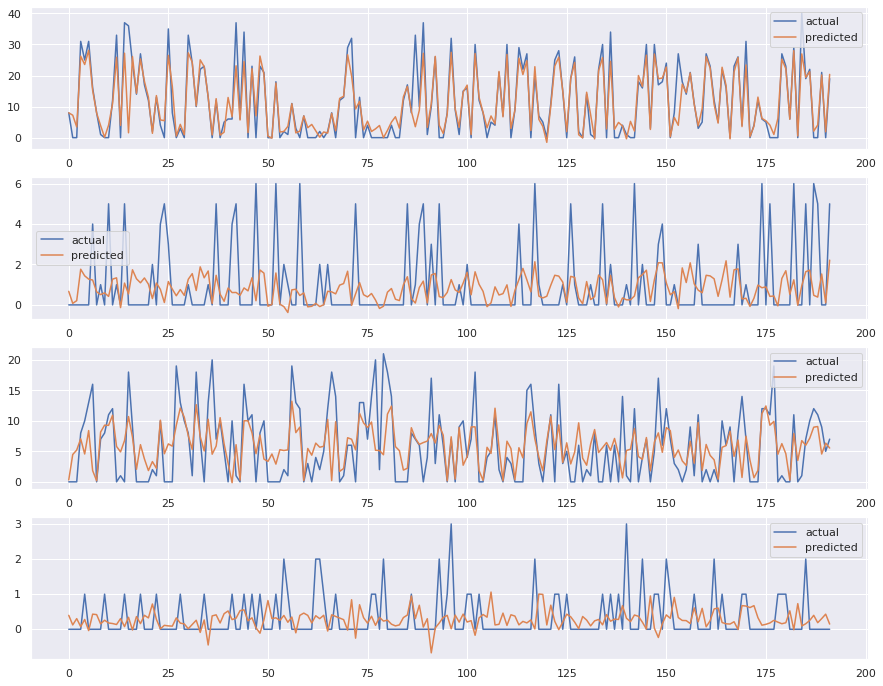

In [207]:
nchannels = y2.shape[1]
fig, ax = plt.subplots(nrows=nchannels, ncols=1, figsize=(15, 12))
for i in range(nchannels):
  ax[i].plot(y2_test[:, i], label="actual")
  ax[i].plot(test_preds[:, i], label="predicted")
  ax[i].legend()